<a href="https://colab.research.google.com/github/Ash99-commits/FUTURE_DS_03/blob/main/Student_Feedback_Response_Survey_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name : Student_Feedback_Response_Survey_Analysis

Author : Ashwani Kumar Patra

Contribution : Individual

## Objective :-

Analyzing student event feedback,
1. To uncover satisfaction trends
2. To suggest improvements using survey data.

## Project Summary :-

This project involved loading student feedback data from a GitHub repository, performing initial data exploration to check for missing values and duplicates, cleaning the data by renaming and dropping unnecessary columns, and visualizing the data using bar plots, box plots, histograms, and a correlation heatmap to understand feedback trends and relationships between different feedback categories.

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Importing data via Github :-

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Ash99-commits/FUTURE_DS_03/main/student_feedback.csv')

## First look of the dataset :-

In [3]:
data.head(10)

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9
5,5,832,7,2,7,8,3,5,1,4
6,6,772,9,3,5,2,10,3,8,1
7,7,961,9,8,7,4,4,3,3,10
8,8,814,6,5,8,6,4,4,7,9
9,9,863,5,9,4,7,9,4,4,5


## Understanding the data :-

In [4]:
# Shape of the Datast

data.shape

(1001, 10)

👉 Total rows : 1001

👉 Total columns : 10

In [5]:
# Info of the Dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  1001 non-null   int64
 9

👉 The columns have there datatypes correctly placed.

👉 So far, no null/missing values found in any column. Still would be double checking it.

In [6]:
# Final Check for the presence of any null/missing values.

data.isnull().sum()

,0
Unnamed: 0,0
Student ID,0
Well versed with the subject,0
Explains concepts in an understandable way,0
Use of presentations,0
Degree of difficulty of assignments,0
Solves doubts willingly,0
Structuring of the course,0
Provides support for students going above and beyond,0
Course recommendation based on relevance,0


👉 No null/missing values found.

In [7]:
# Checking for the presence of duplicates

data.duplicated().sum()

np.int64(0)

👉 No duplicates found.

In [8]:
# Documenting the column names before dropping the unnecessary ones and renaming all of them

data.columns

Index(['Unnamed: 0', 'Student ID', 'Well versed with the subject',
       'Explains concepts in an understandable way', 'Use of presentations',
       'Degree of difficulty of assignments', 'Solves doubts willingly',
       'Structuring of the course',
       'Provides support for students going above and beyond',
       'Course recommendation based on relevance'],
      dtype='object')

In [ ]:
# Dropping the 'Unnamed: 0' column
data.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
# Renaming all the columns

data.rename(columns = {
    'Student ID': 'Student ID',
    'Well versed with the subject': 'Subject Knowledge',
    'Explains concepts in an understandable way': 'Concept Clarity',
    'Use of presentations': 'Presentation Usage',
    'Degree of difficulty of assignments': 'Assignment Difficulty',
    'Solves doubts willingly': 'Doubt Resolution',
    'Structuring of the course': 'Course Structure',
    'Provides support for students going above and beyond': 'Student Support',
    'Course recommendation based on relevance': 'Course Relevance' }, inplace=True)

In [11]:
# Checking all the column names after completion of dropping and renaming operations

data.columns

Index(['Student ID', 'Subject Knowledge', 'Concept Clarity',
       'Presentation Usage', 'Assignment Difficulty', 'Doubt Resolution',
       'Course Structure', 'Student Support', 'Course Relevance'],
      dtype='object')

## Understanding the descriptive Statistics of the Dataset :-

In [12]:
# Viewing descriptive statistics for all the rating columns (excluding 'Student ID')

rating_columns = data.columns.drop('Student ID')

In [13]:
descriptive_stats = data[rating_columns].describe()
print(descriptive_stats)

       Subject Knowledge  Concept Clarity  Presentation Usage  \
count        1001.000000      1001.000000         1001.000000   
mean            7.497502         6.081918            5.942058   
std             1.692998         2.597168            1.415853   
min             5.000000         2.000000            4.000000   
25%             6.000000         4.000000            5.000000   
50%             8.000000         6.000000            6.000000   
75%             9.000000         8.000000            7.000000   
max            10.000000        10.000000            8.000000   

       Assignment Difficulty  Doubt Resolution  Course Structure  \
count            1001.000000       1001.000000       1001.000000   
mean                5.430569          5.474525          5.636364   
std                 2.869046          2.874648          2.920212   
min                 1.000000          1.000000          1.000000   
25%                 3.000000          3.000000          3.000000   
50%   

### Insights found from the statistics above,

*   **Subject Knowledge**: Average rating is high (7.50), with a low standard deviation (1.69) and min/max of 5/10, indicating consistent positive feedback.
*   **Concept Clarity**: Average is moderate (6.08), but the high standard deviation (2.60) and wide min/max (2/10) show varied student opinions.
*   **Presentation Usage**: Average is moderate (5.94), and the low standard deviation (1.42) and smaller min/max range (4/8) suggest consistent feedback on presentation use.
*   **Assignment Difficulty**: Average is moderate (5.43), but the high standard deviation (2.87) and wide min/max (1/10) indicate diverse opinions on difficulty.
*   **Doubt Resolution**: Average is moderate (5.47), with a high standard deviation (2.87) and wide min/max (1/10), showing varied student experiences with doubt solving.
*   **Course Structure**: Average is moderate (5.64), with the highest standard deviation (2.92) and wide min/max (1/10), highlighting the most varied feedback on course structure.
*   **Student Support**: Average is moderate (5.66), with a high standard deviation (2.89) and wide min/max (1/10), suggesting varied opinions on extra support.
*   **Course Relevance**: Average is moderate (5.60), with a high standard deviation (2.89) and wide min/max (1/10), indicating diverse feedback on course relevance and recommendation likelihood.

## Visualization Charts

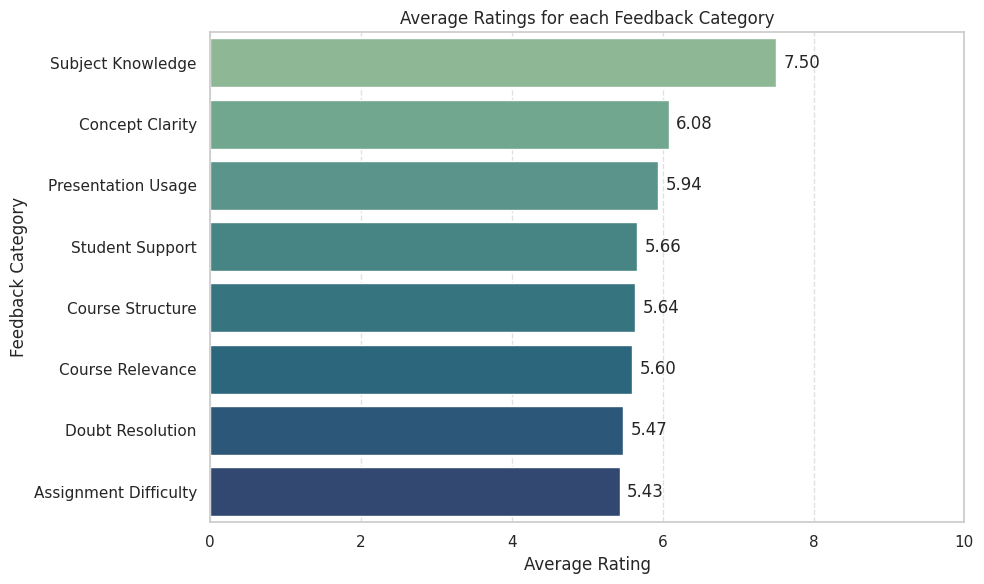

In [18]:
# Chart 1 - Average ratings for each column - Horizontal Barplot

average_ratings = data[rating_columns].mean().sort_values(ascending=False)

sns.set(style='whitegrid', palette='viridis')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=average_ratings.values, y=average_ratings.index, orient='h', palette='crest')

plt.title('Average Ratings for each Feedback Category')
plt.xlabel('Average Rating')
plt.ylabel('Feedback Category')
plt.xlim(0, 10)  # Assuming ratings are on a scale of 1 to 10
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Adding annotations
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height()/2,
             '{:,.2f}'.format(width),
             va='center')

plt.tight_layout()
plt.show()

### Key Trends :-

1. **Highest-rated**: Subject Knowledge (7.50) - indicates strong content mastery and effective delivery by facilitators.

2. **Moderately rated**: Concept Clarity (6.08) and Presentation Usage (5.94) - show reasonable satisfaction but scope for clearer communication and engaging visuals.

3. **Lower-rated aspects (5.4-5.7 range)**: Student Support, Course Structure, Course Relevance, Doubt Resolution, and Assignment Difficulty - suggest overall average satisfaction levels, indicating operational or structural improvement areas.

### Improvement Suggestions :-

1. **Enhance Concept Clarity**: Incorporate more real-world examples, interactive demos, and Q&A sessions.

2. **Improve Presentation Usage**: Use more visual aids, concise slides, and data-driven storytelling for engagement.

3. **Strengthen Student Support & Doubt Resolution**: Establish faster query response systems and mentorship touchpoints.

4. **Refine Course Structure & Relevance**: Align modules more closely with current industry tools and skill requirements.

5. **Optimize Assignment Difficulty**: Balance challenge level with learning goals, ensuring clarity in instructions and grading rubrics.

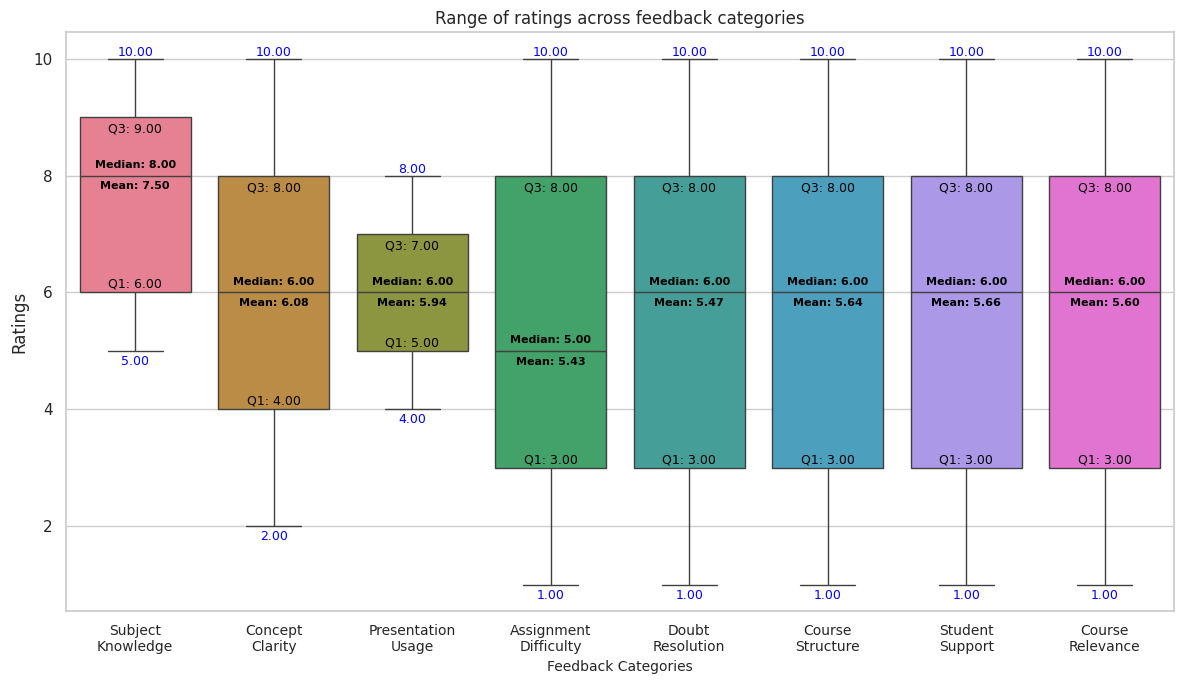

In [21]:
# Chart 2 - Range of ratings across feedback categories - Boxplot

plt.figure(figsize=(12, 7))
ax = sns.boxplot(data=data[rating_columns])
plt.title('Range of ratings across feedback categories')
plt.xlabel('Feedback Categories', fontsize=10)
plt.ylabel('Ratings')

# Modifying x-axis labels to wrap the second word
new_labels = [label.replace(' ', '\n', 1) for label in rating_columns]
ax.set_xticklabels(new_labels, rotation=0, ha='center', fontsize=10)

# Annotating the boxplot with median and mean values
for i, col in enumerate(rating_columns):
    median_val = data[col].median()
    mean_val = data[col].mean()
    plt.text(i, median_val + 0.1, f'Median: {median_val:.2f}', horizontalalignment='center', color='black', weight='semibold', fontsize=8, verticalalignment='bottom')
    plt.text(i, median_val - 0.1, f'Mean: {mean_val:.2f}', horizontalalignment='center', color='black', weight='semibold', verticalalignment='top', fontsize=8)

# Annotating the whiskers and quartiles
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    upper_whisker = data[col][data[col] <= q3 + 1.5 * iqr].max()
    lower_whisker = data[col][data[col] >= q1 - 1.5 * iqr].min()

    plt.text(i, upper_whisker, f'{upper_whisker:.2f}', horizontalalignment='center', color='blue', verticalalignment='bottom', fontsize=9)
    plt.text(i, lower_whisker - 0.07, f'{lower_whisker:.2f}', horizontalalignment='center', color='blue', verticalalignment='top', fontsize=9)
    plt.text(i, q1 + 0.25, f'Q1: {q1:.2f}', horizontalalignment='center', color='black', verticalalignment='top', fontsize=9)
    plt.text(i, q3 - 0.1, f'Q3: {q3:.2f}', horizontalalignment='center', color='black', verticalalignment='top', fontsize=9)

plt.tight_layout()
plt.show()

### Key Trends :-

1. **Subject Knowledge** shows consistently high ratings (median = 8, narrow IQR), confirming strong consensus on faculty expertise.

2. **Concept Clarity** and **Presentation Usage** display moderate central values but broader spread, indicating uneven understanding among participants.

3. Remaining categories **(Support**, **Structure**,** Relevance**, **Doubt Resolution**, **Assignments**) exhibit wide rating dispersion (Q1≈3, Q3≈8), revealing inconsistency in student experiences.

4. **Overall pattern**: While academic content quality is well perceived, delivery and support processes vary notably across participants.

### Improvement Suggestions :-

1. **Standardize Learning Delivery**: Reduce variability through consistent teaching formats and uniform content quality.

2. **Stabilize Student Experience**: Introduce structured mentoring and feedback loops to minimize rating spread in support-related areas.

3. **Refine Instructional Design**: Employ peer reviews or shared teaching resources to align clarity and presentation across sessions.

4. **Monitor Rating Variability**: Regularly analyze distribution patterns to ensure improvement efforts narrow the satisfaction gap.

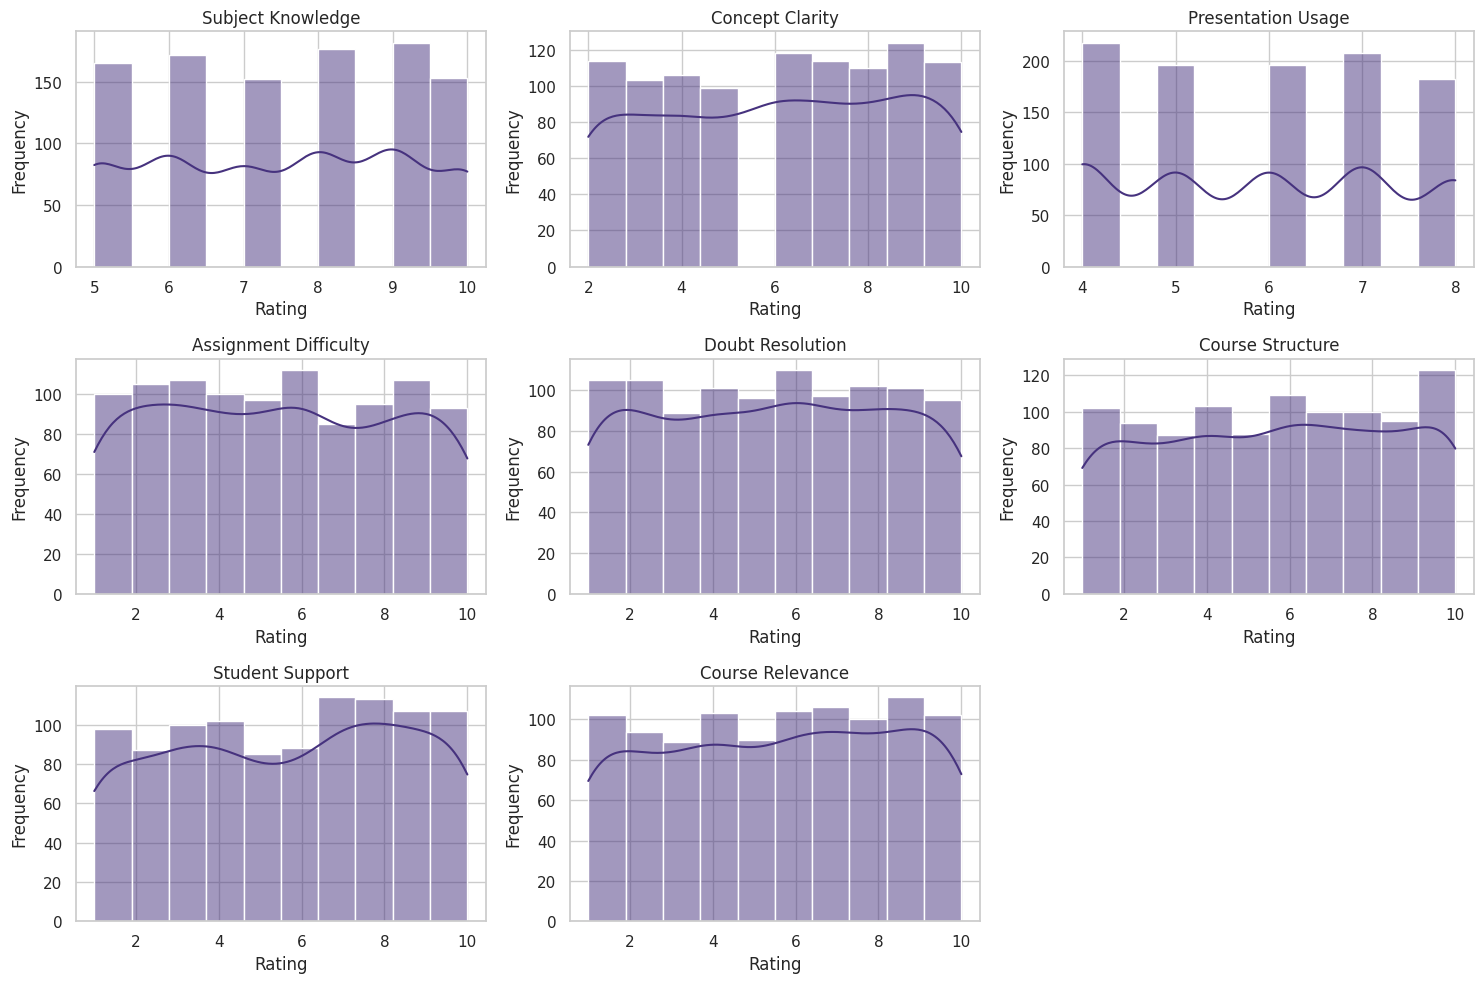

In [16]:
# Chart 3 - Column-wise Distribution of Ratings - Histograms with KDE curve

plt.figure(figsize=(15, 10))
for i, col in enumerate(rating_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[col], bins=10, kde=True)
    plt.title(col)
    plt.xlabel("Rating")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### Key Trends :-

1. **Subject Knowledge** and **Presentation Usage** show concentration around higher rating values (7–9), suggesting participants recognize instructor expertise and effective visual delivery.

2. **Concept Clarity** and **Student Support** display relatively balanced frequency across mid-to-high ratings, indicating general satisfaction but varied individual experiences.

3. Remaining categories (**Course Structure**, **Relevance**, **Doubt Resolution**, and **Assignment Difficulty**) exhibit flatter distributions, reflecting mixed opinions and less uniform satisfaction across attendees.

### Improvement Suggestions :-

1. **Enhance Consistency Across Sessions**: Develop structured delivery checklists to minimize uneven experiences between batches.

2. **Target Mid-Performing Areas**: Focus review sessions on conceptual clarity, support responsiveness, and structured guidance.

3. **Refine Course Framework**: Reassess curriculum flow and difficulty pacing to ensure learners progress smoothly through modules.

4. **Data-Driven Monitoring**: Track future rating distributions to identify emerging patterns and validate impact of improvement measures.

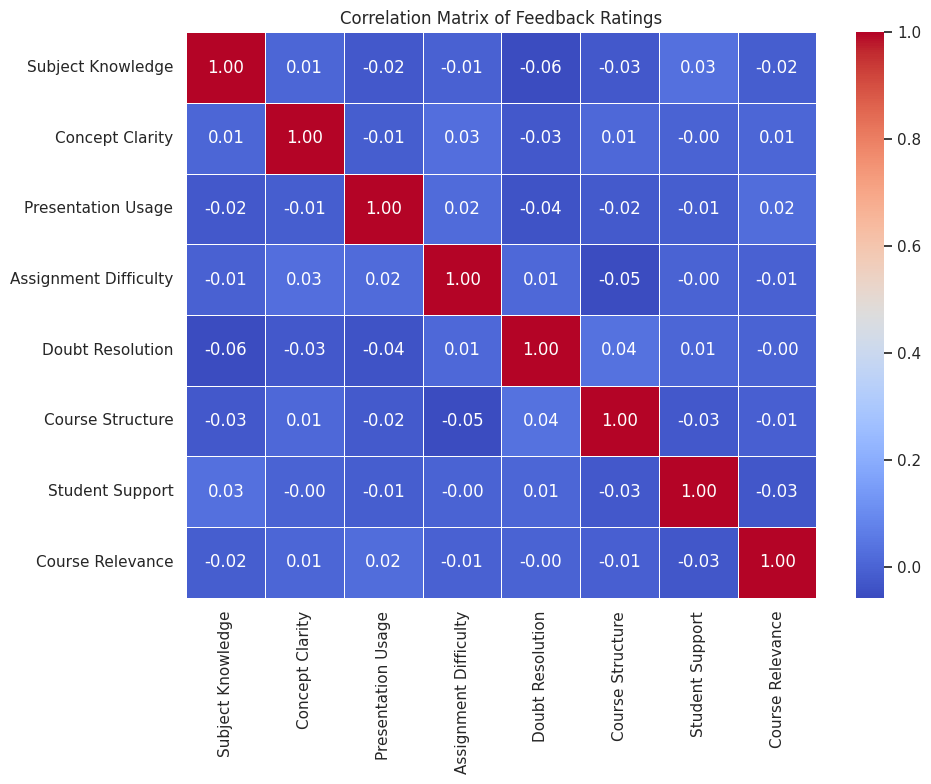

In [22]:
# Chart 4 - Correlation matrix
correlation_matrix = data[rating_columns].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Feedback Ratings')
plt.tight_layout()
plt.show()

### Key Trends :-

1. The matrix indicates minimal interdependence among feedback categories - correlations hover close to zero.

2. This suggests that students evaluate each dimension independently, reflecting unbiased and distinct perceptions for every aspect.

3. No strong positive or negative associations imply that improvement in one area may not automatically influence others.

### Improvement Suggestions :-

1. **Adopt Integrated Enhancement Strategies**: Since categories operate independently, holistic improvement initiatives should target each domain specifically.

2. **Investigate Underlying Disconnects**: Explore why elements like Concept Clarity and Course Relevance show weak alignment — potentially due to fragmented course design or isolated evaluation focus.

3. **Enhance Cross-Domain Cohesion**: Introduce feedback mechanisms that link teaching quality, support, and relevance, ensuring a more cohesive learning experience.

4. **Refine Survey Structure**: Future iterations could include dependent metrics or composite indicators to better capture inter-category relationships.

## Conclusion :-

Overall, participants appreciated the instructors’ knowledge but desired more clarity, support, and structural coherence in the learning experience.
Ratings reveal satisfaction rooted in content strength but constrained by delivery inconsistencies.
Addressing gaps in clarity, assistance, and cohesion could significantly enhance overall learner satisfaction.
Targeted and balanced improvement efforts will help establish a more unified and engaging academic environment.